<a href="https://colab.research.google.com/github/boucher-broderick/Ml_AI/blob/main/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
The problem of recognizing human handwriting, specifically numerals, presents a classic yet complex challenge in the field of machine learning and computer vision. It involves interpreting diverse handwriting styles and translating them into digital representations that computers can understand and process. This task is crucial for numerous applications, including automated form processing, banking systems for check verification, and educational tools for digitizing handwritten notes. The variability in individual handwriting styles—ranging from differences in size, shape, and slant—makes this a non-trivial problem, requiring robust algorithms capable of capturing and learning from these nuances to accurately recognize handwritten digits.


In this project, we leverage a neural network to tackle the complex task of recognizing handwritten numbers, a pivotal challenge in machine learning and computer vision. Neural networks, inspired by the human brain's architecture, excel in identifying patterns and nuances in data, making them ideally suited for deciphering varied handwriting styles. Their ability to learn from vast amounts of data and improve accuracy through deep layers that abstract features at different levels enables unparalleled performance in tasks like digit recognition. This capability positions neural networks as the optimal choice for accurately and efficiently converting human handwriting into actionable digital information.

The Dataset: https://www.kaggle.com/competitions/digit-recognizer/code?competitionId=3004&sortBy=scoreDescending

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/MLandAI/kaggle.json ~/.kaggle/kaggle.json
!kaggle competitions download -c digit-recognizer

 85% 13.0M/15.3M [00:01<00:00, 17.1MB/s]
100% 15.3M/15.3M [00:01<00:00, 10.6MB/s]


In [ ]:
! unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train_data = pd.read_csv('../content/train.csv')
test_data = pd.read_csv("../content/test.csv")


# EDA

We will now preform an EDA to get a better understanding of the dataset. This will include looking at the data, its shape, picking out some random data, as well as the distribution of the numbers. The dataset does not have to be cleaned as all of the values are integers and there are no null or empty values.



In [27]:
train_data.shape

(42000, 785)

The dataset for digit recognition comprises images represented in a grid of 28x28 pixels, totaling 784 pixels per image. Each pixel's value ranges from 0 to 255, denoting the pixel's lightness or darkness, with higher values indicating darker pixels. The training data consists of 785 columns: the first column is the label indicating the digit (0-9) drawn by the user, and the subsequent 784 columns represent the pixel values of the image. The naming convention of these pixel columns follows "pixelx," where x ranges from 0 to 783, mapping to specific row and column positions in the 28x28 pixel grid based on the formula x = i * 28 + j.

In [28]:
pd.set_option('display.max_columns', 200)
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,...,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,209,101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


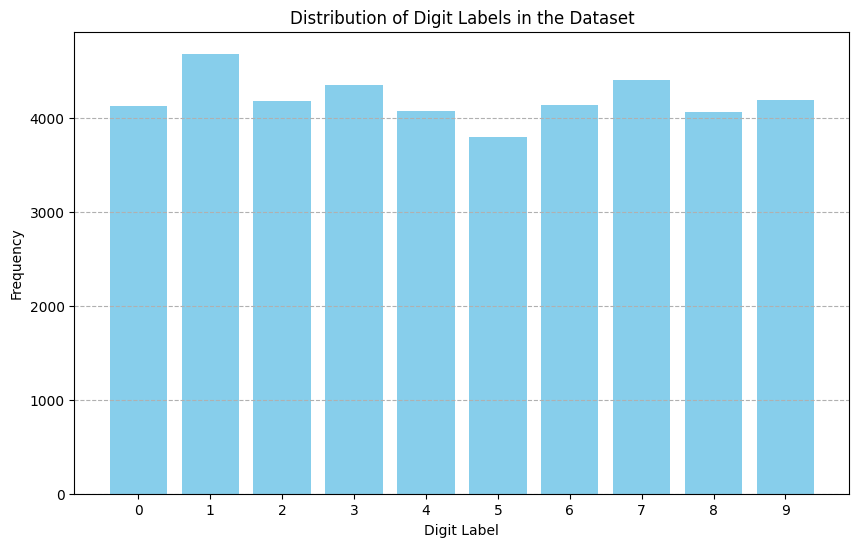

In [30]:
import matplotlib.pyplot as plt

label_counts = train_data['label'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.xlabel('Digit Label')
plt.ylabel('Frequency')
plt.title('Distribution of Digit Labels in the Dataset')
plt.xticks(range(10))
plt.grid(axis='y', linestyle='--')

plt.show()

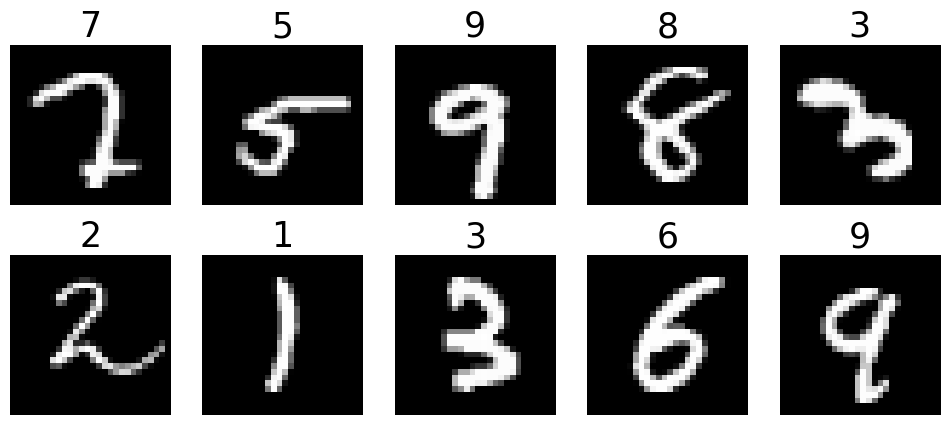

In [29]:
y_train = train_data['label'].values
X_train = train_data.drop(columns=['label']).values/255
fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
idx = np.random.randint(0,42000,size=10)
for i in range(10):
    axes[i].imshow(X_train[idx[i],:].reshape(28,28), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(str(int(y_train[idx[i]])), color= 'black', fontsize=25)
plt.show()

# The Neural Network
Now that we have an understanding of the data, we can create our neural network. The Neural Network class that trains our model will contain:

- **__init__ (Constructor):** Initializes the neural network with random weights and biases. It sets up the network architecture with specified sizes for the input layer, hidden layer, and output layer.

- **relu:** The Rectified Linear Unit (ReLU) activation function. It takes a numeric argument (z) and returns the maximum between 0 and z. This function introduces non-linearity to the model, allowing it to learn complex patterns.

- **softmax:** The softmax function converts the raw output scores (logits) from the network into probabilities by taking the exponential of each output and then normalizing these values by dividing by the sum of all the exponentials. This function is typically used in the output layer of a classifier to obtain probabilities for each class.

- **forward_propagation:** This method computes the forward pass of the neural network. It takes the input data (X), computes the hidden layer values by applying weights (W1), biases (b1), and the ReLU activation function, and then computes the output layer values (before activation) using the second set of weights (W2) and biases (b2). The softmax function is applied to the output layer to obtain the final class probabilities.

- **backward_propagation:** Implements the backward pass of the neural network, calculating the gradients of the loss function with respect to the weights and biases. This method uses the chain rule to propagate errors back through the network, which is essential for learning. The inputs are the features (X) and the true labels (y).

- **update_parameters:** Updates the network's weights and biases using the gradients computed in the backward pass and a given learning rate. This step is crucial for the learning process, allowing the network to improve its predictions.

- **compute_loss:** Calculates the loss using the cross-entropy loss function, which measures the difference between the predicted probabilities (y_pred) and the actual labels (y_true). This function is key for evaluating how well the model is performing.

- **predict:** Generates predictions for new data (X). It performs a forward pass through the network and returns the class with the highest probability as the prediction for each input sample.

- **train:** Orchestrates the training process over a specified number of epochs. It shuffles the training data, divides it into minibatches, performs forward and backward passes for each batch, updates the parameters, and prints the loss at regular intervals. This method enables the model to learn from the training data iteratively.

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros(output_size)

    def relu(self, z):
        return np.maximum(0, z)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def forward_propagation(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.softmax(self.Z2)
        return self.A2

    def backward_propagation(self, X, y):
        m = y.shape[0]
        delta2 = self.A2
        delta2[range(m), y] -= 1
        dW2 = np.dot(self.A1.T, delta2) / m
        db2 = np.sum(delta2, axis=0) / m
        delta1 = np.dot(delta2, self.W2.T)
        delta1[self.Z1 <= 0] = 0
        dW1 = np.dot(X.T, delta1) / m
        db1 = np.sum(delta1, axis=0) / m
        return dW1, db1, dW2, db2

    def update_parameters(self, grads, learning_rate):
        dW1, db1, dW2, db2 = grads
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def compute_loss(self, y_pred, y_true):
        m = y_true.shape[0]
        log_probs = -np.log(y_pred[range(m), y_true])
        loss = np.sum(log_probs) / m
        return loss

    def predict(self, X):
        y_pred = self.forward_propagation(X)
        return np.argmax(y_pred, axis=1)

    def train(self, X_train, y_train, epochs, learning_rate, batch_size):
        m = X_train.shape[0]
        for epoch in range(epochs):
            permutation = np.random.permutation(m)
            X_train_shuffled = X_train[permutation]
            y_train_shuffled = y_train[permutation]

            for i in range(0, m, batch_size):
                X_batch = X_train_shuffled[i:i+batch_size]
                y_batch = y_train_shuffled[i:i+batch_size]

                y_pred = self.forward_propagation(X_batch)
                loss = self.compute_loss(y_pred, y_batch)
                grads = self.backward_propagation(X_batch, y_batch)
                self.update_parameters(grads, learning_rate)

            if epoch % 10 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')



In [ ]:
from sklearn.model_selection import train_test_split

y_train_full = train_data['label'].values
X_train_full = train_data.drop(columns=['label']).values / 255

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

nn = NeuralNetwork(input_size=784, hidden_size=256, output_size=10)

nn.train(X_train, y_train, epochs=21, learning_rate=0.01, batch_size=64)

predictions = nn.predict(X_val)

Epoch 0, Loss: 0.48038529386295353
Epoch 10, Loss: 0.4020409905385658


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

precision = precision_score(y_val, predictions, average='macro')
recall = recall_score(y_val, predictions, average='macro')
f1 = f1_score(y_val, predictions, average='macro')
conf_matrix = confusion_matrix(y_val, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

Precision: 0.9393398783552931
Recall: 0.9393619490665106
F1 Score: 0.9392785552848117
Confusion Matrix:
[[797   0   1   0   3   5   6   0   4   0]
 [  0 892   3   1   1   1   1   2   7   1]
 [  3   8 787   5  14   2   5   6  14   2]
 [  1   2  17 863   0  17   1   9  16  11]
 [  2   1   8   2 777   1   9   3   2  34]
 [  5   2   3  15   8 648  10   3   6   2]
 [  7   1   6   2   4   8 755   0   2   0]
 [  0   4  14   4  11   3   0 823   2  32]
 [  2   7   6  23   4   8   6   3 769   7]
 [  6   4   2  14  12   2   0  15   3 780]]


# Results
The performance metrics of the neural network model for digit recognition showcase its high effectiveness, with precision, recall, and F1 score all around 93.93%, indicating a balanced and accurate prediction capability across all digit classes. The confusion matrix reveals strong diagonal values, signifying correct classifications, with minor misclassifications primarily between visually similar digits, such as '4' misclassified as '9' and '7' as '9'. These results highlight the model's proficiency in distinguishing between different handwritten digits while also identifying areas for potential improvement in handling similarities between specific digit pairs.

Initially, the training process for the neural network was slow, primarily due to the use of the entire dataset for each iteration of weight updates. To address this inefficiency and accelerate the training, I employed minibatch gradient descent. This technique involves dividing the dataset into smaller subsets or "minibatches," allowing for more frequent updates to the model's weights. This not only speeds up the training process by leveraging vectorized operations more efficiently but also helps in reducing the variance of the updates, leading to a more stable convergence. Furthermore, reducing the number of epochs to 20 and splitting the dataset into training and validation sets minimized the computational load without compromising the model's ability to learn effectively. These steps were critical in enhancing the speed of the training process, enabling it to run within the desired time frame while still maintaining a high level of accuracy.

# TensorFlow

The TensorFlow model we implemented is a 2-layer neural network designed for digit recognition, leveraging TensorFlow's robust, flexible architecture for deep learning tasks. TensorFlow, an open-source library developed by Google, excels in numerical computation and large-scale machine learning.

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation accuracy with TensorFlow model: {val_accuracy*100:.2f}%')


Epoch 1/20
525/525 [==============================] - 6s 10ms/step - loss: 0.2852 - accuracy: 0.9183 - val_loss: 0.1699 - val_accuracy: 0.9498
Epoch 2/20
525/525 [==============================] - 6s 11ms/step - loss: 0.1180 - accuracy: 0.9656 - val_loss: 0.1134 - val_accuracy: 0.9660
Epoch 3/20
525/525 [==============================] - 5s 10ms/step - loss: 0.0765 - accuracy: 0.9779 - val_loss: 0.1131 - val_accuracy: 0.9664
Epoch 4/20
525/525 [==============================] - 5s 9ms/step - loss: 0.0517 - accuracy: 0.9844 - val_loss: 0.0998 - val_accuracy: 0.9676
Epoch 5/20
525/525 [==============================] - 6s 11ms/step - loss: 0.0380 - accuracy: 0.9884 - val_loss: 0.0885 - val_accuracy: 0.9729
Epoch 6/20
525/525 [==============================] - 5s 10ms/step - loss: 0.0259 - accuracy: 0.9924 - val_loss: 0.0867 - val_accuracy: 0.9744
Epoch 7/20
525/525 [==============================] - 5s 9ms/step - loss: 0.0187 - accuracy: 0.9951 - val_loss: 0.0923 - val_accuracy: 0.9736
E

In [ ]:
predictions = model.predict(X_val)
predicted_classes = np.argmax(predictions, axis=1)

precision = precision_score(y_val, predicted_classes, average='macro')
recall = recall_score(y_val, predicted_classes, average='macro')
f1 = f1_score(y_val, predicted_classes, average='macro')
conf_matrix = confusion_matrix(y_val, predicted_classes)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

263/263 [==============================] - 2s 5ms/step
Precision: 0.9818
Recall: 0.9819
F1 Score: 0.9819
Confusion Matrix:
[[806   0   1   1   0   0   5   1   1   1]
 [  0 902   2   0   1   0   0   1   3   0]
 [  1   6 826   4   4   0   1   1   2   1]
 [  0   1   1 915   0   6   0   2   8   4]
 [  3   0   0   0 819   1   7   2   0   7]
 [  1   0   0   4   0 688   4   2   1   2]
 [  1   1   1   0   0   2 779   0   1   0]
 [  0   0   5   1   2   2   0 879   1   3]
 [  1   5   3   2   2   3   1   2 815   1]
 [  0   1   1   5   3   1   0   7   1 819]]


# Results

The TensorFlow model demonstrates exceptional accuracy in digit recognition, with precision, recall, and F1 score all above 98%. The confusion matrix indicates minimal misclassifications, showcasing the model's effectiveness in distinguishing between similar handwriting patterns. This high level of performance highlights the neural network's capability to learn complex features, underlining TensorFlow's efficiency and the model's robustness in classification tasks.

In selecting hyperparameters, the approach was iterative and based on experimentation. Initially, default values for the learning rate, batch size, and number of epochs were chosen based on common practices. The learning rate was adjusted to optimize convergence speed without overshooting, using smaller values for finer adjustments. Regularization was not initially applied to keep the model simple and observe its performance; depending on overfitting observations, techniques like L2 regularization could be considered. An optimization algorithm, specifically Adam, was used for its adaptive learning rate properties, making it efficient and effective for a wide range of problems.

# Conclusion

In conclusion, comparing the custom-built neural network with the TensorFlow-based model for digit recognition reveals distinct advantages in using advanced deep learning frameworks like TensorFlow. While the custom model demonstrated commendable accuracy with precision, recall, and F1 scores around 93.93%, the TensorFlow model surpassed this, achieving scores above 98% across these metrics. This superiority can be attributed to TensorFlow's sophisticated optimization algorithms, efficient data handling, and automatic differentiation capabilities, which streamline the model training process and enhance learning from complex patterns in data. Therefore, for tasks requiring nuanced feature recognition, such as handwritten digit classification, leveraging TensorFlow not only simplifies the development process but also significantly boosts model performance.